# Proyecto portafolio de inversión para un fondo de la universidad.

En este proyecto se creará un portafolio que pueda generar el 200% de rendimiento, en un periodo de 4 años para la universidad del hijo de un inversionista.

# Objetivos

### Objetivo principal
- El objetivo **principal** será ver si en las simulaciones que se crearán, con un portafolio de algunos activos financieros, se puede lograr un 200% de rendimiento a 4 años para que el inversionista pueda sostener los gastos de universidad de su hijo.

##### Objetivos secundarios
- El **primer** objetivo secundario es poder generar al menos 1,000 escenarios en los que se proyecten los rendimientos esperados para los 4 años.
- El **segundo** objetivo secundario es poder analizar, a partir de los rendimientos esperados y generar en cada uno de los escenarios para los 4 años de los precios de cierre para proyectar las ganancias posibles, si se abriera el portafolio el día de hoy 23/04/2022.
    
Todos los objetivos se harán dos veces para probar que tan bueno es el modelo de predicción, primero lo haremos de 2018 al día de hoy que es 23/04/2022 y después de el final de esa misma fecha 4 años después.

In [1]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Descargaremos los datos para las acciones de los activos más famosos del momento y para un índice.

In [23]:
names  = ["FB", 'AMZN', '^GSPC']
#Fechas en "yyyy-mm-dd"
start  = "2014-04-23"
end    = "2018-04-23"
def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

data   = getClose(names, start, end)
data.head()

Symbols,FB,AMZN,^GSPC
Date,,,
2014-04-23,61.360001,324.579987,1875.390015
2014-04-24,60.869999,337.149994,1878.609985
2014-04-25,57.709999,303.829987,1863.400024
2014-04-28,56.139999,296.579987,1869.430054
2014-04-29,58.150002,300.380005,1878.329956


Veamos como se ve esta gráfica:

In [24]:
data.describe()

Symbols,FB,AMZN,^GSPC
count,1008.000000,1008.000000,1008.000000
mean,116.352004,700.945814,2200.444375
std,36.832301,325.126482,244.839761
min,56.139999,286.950012,1829.079956
25%,80.895000,390.882492,2028.000000
50%,113.540001,674.575012,2104.744995
75%,144.062504,907.462479,2381.777466
max,193.089996,1598.390015,2872.870117


<AxesSubplot:xlabel='Date'>

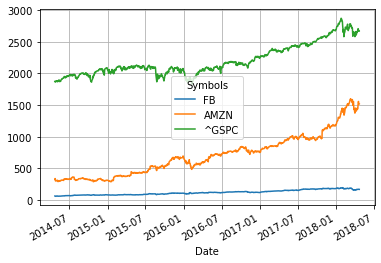

In [25]:
data.plot(grid=True)

Observamos que algunos activos no han tenido un crecimiento tan grande como los 2 principales, que son amazon y el índice $ S&P500 $. Ahora queremos saber qué tal se ve su distribución.

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'AMZN'}>],
       [<AxesSubplot:title={'center':'^GSPC'}>, <AxesSubplot:>]],
      dtype=object)

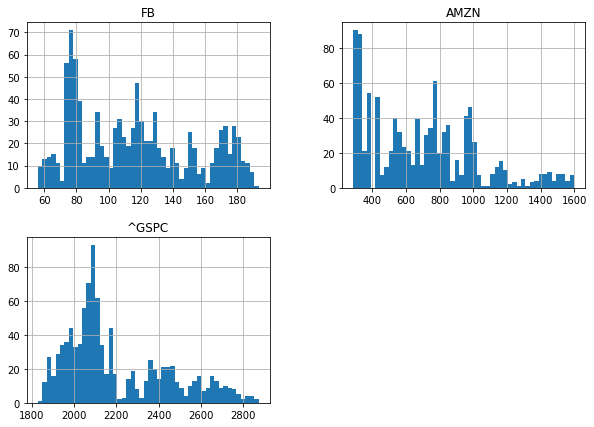

In [26]:
data.hist(bins=50, figsize=(10,7))

Ahora obtendremos los rendimientos diarios para los activos y también veremos su distribución.

<AxesSubplot:xlabel='Date'>

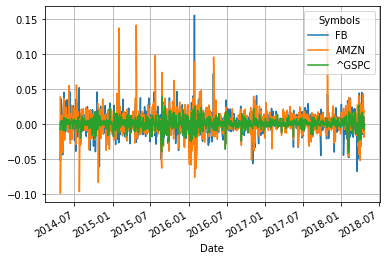

In [27]:
R = ((data - data.shift())/data.shift()).dropna()
R.plot(grid=True)

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'AMZN'}>],
       [<AxesSubplot:title={'center':'^GSPC'}>, <AxesSubplot:>]],
      dtype=object)

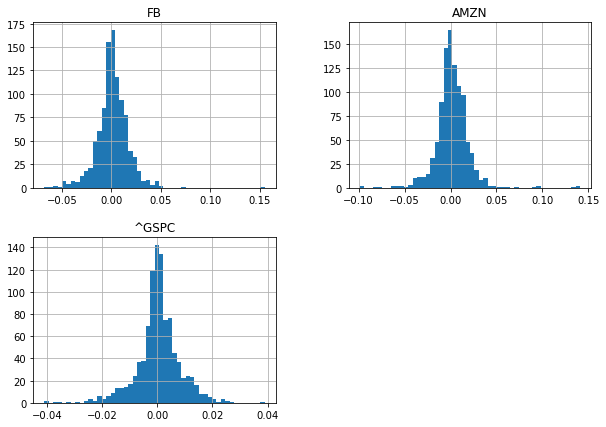

In [8]:
R.hist(bins=50, figsize=(10,7))

In [9]:
R.describe()

Symbols,FB,AMZN,^GSPC
count,1007.000000,1007.000000,1007.000000
mean,0.001119,0.001703,0.000383
std,0.016280,0.018559,0.008043
min,-0.067697,-0.098828,-0.040979
25%,-0.006377,-0.006608,-0.002808
50%,0.001097,0.001287,0.000418
75%,0.010135,0.010696,0.004441
max,0.155214,0.141311,0.039034


Primero generamos sus medias y desviaciones estándar. Luego generamos las fechas en las que queremos predecir los datos, en la primer parte veremos que tan preciso es para los años de 2018 a la fecha actual (23-04-2022).

In [10]:
media_FB   = R["FB"].mean()
std_FB     = R["FB"].std()

media_AMZN = R["AMZN"].mean()
std_AMZN   = R["AMZN"].std()

media_GSPC = R["^GSPC"].mean()
std_GSPC   = R["^GSPC"].std()                             
               
               
media_FB, std_FB, media_AMZN, std_AMZN, media_GSPC, std_GSPC

(0.0011194682501020426,
 0.016280000246051397,
 0.0017031988053723163,
 0.018559234277843402,
 0.0003833731295340807,
 0.008043227541200687)

<AxesSubplot:>

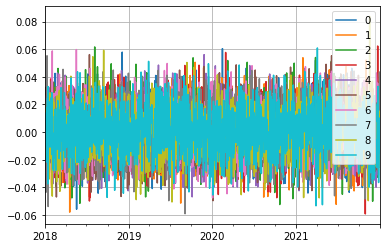

In [14]:
def simR(names, means, stds, start, dias, N) :
    sims           = {}
    fechas         = pd.date_range(start, periods=dias)
    for name, mean, std in zip(names, means, stds) :
        R_sim      = np.random.normal(mean, std, size=(dias, N))
        sims[name] = pd.DataFrame(data=R_sim, index=fechas)
    return sims

names = ["FB", "AMZN", "^GSPC"]
means = [media_FB, media_AMZN, media_GSPC]
stds  =  [std_FB, std_AMZN, std_GSPC]

sims  = simR(names, means, stds, "2018-01-01", 1461, 10)

sims["FB"].plot(grid=True)

In [28]:
sims          = simR(names, means, stds, "2018-01-01", 1461, 1000)
sims["FB"]    = (sims["FB"] + 1).cumprod()*data["FB"].iloc[-1]
sims["AMZN"]  = (sims["AMZN"] + 1).cumprod()*data["AMZN"].iloc[-1]
sims["^GSPC"] = (sims["^GSPC"] + 1).cumprod()*data["^GSPC"].iloc[-1]

sims["FB"].head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2018-01-01,164.149516,163.102029,164.062049,164.858711,166.808046,162.886708,164.426127,169.302724,164.580801,166.717409,...,163.014040,168.325689,165.931527,165.894768,171.960813,166.768237,165.425196,164.798289,164.790100,163.089408
2018-01-02,164.775989,164.336486,164.660929,162.890669,168.180088,160.914183,166.352024,168.089697,168.400947,165.751484,...,160.338704,167.906413,163.192708,164.622730,175.757849,164.000110,163.053629,165.790046,163.427914,164.981954
2018-01-03,170.353851,167.752243,170.848949,162.553025,164.447526,161.015305,166.378706,166.906359,169.745176,162.955384,...,161.475852,167.491477,163.026830,159.184745,176.140140,163.207014,164.603472,161.449058,165.809329,160.660577
2018-01-04,170.019398,165.359373,175.312795,164.720888,161.314201,161.312152,168.153574,166.509253,172.751558,167.809924,...,159.452848,168.838491,161.226989,155.169525,169.685803,160.335529,167.523371,161.260864,162.875643,158.854970
2018-01-05,170.433081,166.944568,173.548159,163.198652,163.813558,162.312656,167.647549,167.306330,174.153775,171.876511,...,162.486971,166.076182,160.049146,154.858114,172.284639,161.351146,166.058135,157.271851,163.480622,161.696263


In [29]:
valor_deseado_FB   = data["FB"].iloc[-1]*2
valor_deseado_AMZN = data["AMZN"].iloc[-1]*2
valor_deseado_GSPC = data["^GSPC"].iloc[-1]*2

B_FB   = sims["FB"]    >= valor_deseado_FB
B_AMZN = sims["AMZN"]  >= valor_deseado_AMZN
B_GSPC = sims["^GSPC"] >= valor_deseado_GSPC


<AxesSubplot:>

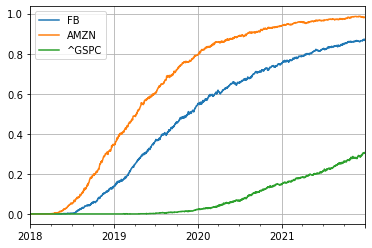

In [31]:
P_FB   = B_FB.mean(axis=1)
P_FB.columns   = ["FB"]

P_AMZN = B_AMZN.mean(axis=1)
P_AMZN.columns = ["AMZN"]

P_GSPC = B_GSPC.mean(axis=1)
P_GSPC.columns = ["^GSPC"]

data3          = pd.DataFrame(index=pd.date_range("2018-01-01", 1461), columns=["FB", "AMZN", "^GSPC"])
data3["FB"]    = P_FB
data3["AMZN"]  = P_AMZN
data3["^GSPC"] = P_GSPC

data3.plot(grid=True)

In [33]:
names2  = ["FB", "AMZN", "^GSPC"]
#Fechas en "yyyy-mm-dd"
start2  = "2018-04-23"
end2    = "2022-04-23"
def getClose_2(names2, start2, end2):
    return web.DataReader(names2, "yahoo", start2, end2)["Adj Close"]

data2   = getClose_2(names2, start2, end2)
data2.head()

Symbols,FB,AMZN,^GSPC
Date,,,
2018-04-23,165.839996,1517.859985,2670.290039
2018-04-24,159.690002,1460.089966,2634.560059
2018-04-25,159.690002,1460.170044,2639.399902
2018-04-26,174.160004,1517.959961,2666.939941
2018-04-27,173.589996,1572.619995,2669.909912


In [34]:
data2.describe()

Symbols,FB,AMZN,^GSPC
count,1009.000000,1009.000000,1009.000000
mean,232.329564,2490.735986,3420.661513
std,65.807407,729.176965,685.950245
min,124.059998,1343.959961,2237.399902
25%,181.300003,1793.400024,2854.879883
50%,209.940002,2351.260010,3168.570068
75%,277.920013,3223.790039,4152.100098
max,382.179993,3731.409912,4796.560059


<AxesSubplot:xlabel='Date'>

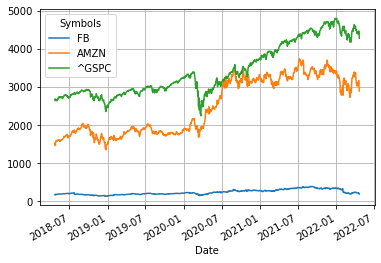

In [35]:
data2.plot(grid=True)

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'AMZN'}>],
       [<AxesSubplot:title={'center':'^GSPC'}>, <AxesSubplot:>]],
      dtype=object)

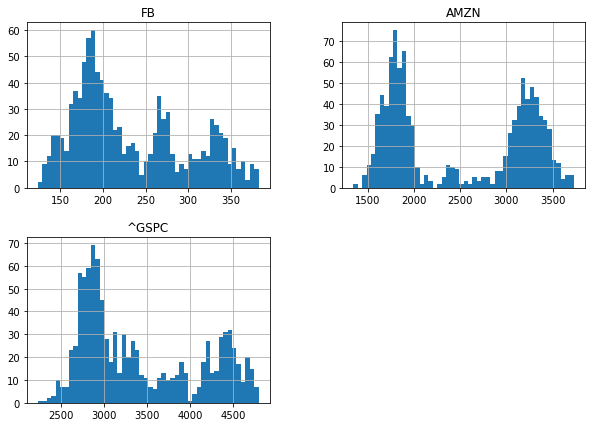

In [36]:
data2.hist(bins=50, figsize=(10,7))

<AxesSubplot:xlabel='Date'>

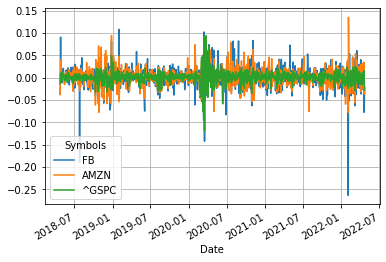

In [38]:
H = ((data2 - data2.shift())/data2.shift()).dropna()
H.plot(grid=True)

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'AMZN'}>],
       [<AxesSubplot:title={'center':'^GSPC'}>, <AxesSubplot:>]],
      dtype=object)

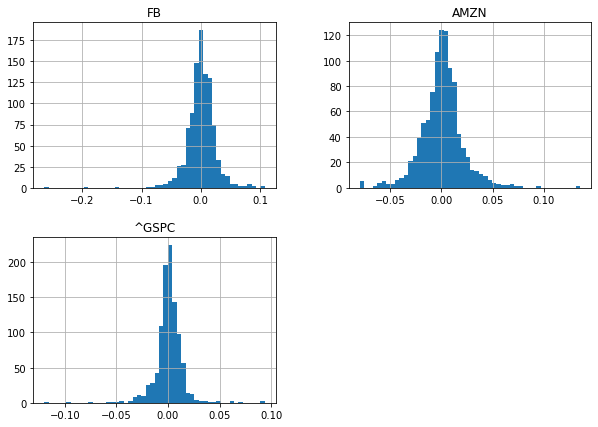

In [39]:
H.hist(bins=50, figsize=(10,7))

In [40]:
H.describe()

Symbols,FB,AMZN,^GSPC
count,1008.000000,1008.000000,1008.000000
mean,0.000420,0.000848,0.000557
std,0.024727,0.020517,0.013457
min,-0.263901,-0.079221,-0.119841
25%,-0.010744,-0.009192,-0.004139
50%,0.000800,0.001195,0.001031
75%,0.013378,0.010874,0.006794
max,0.108164,0.135359,0.093828


In [41]:
media_FB_H   = H["FB"].mean()
std_FB_H     = H["FB"].std()

media_AMZN_H = H["AMZN"].mean()
std_AMZN_H   = H["AMZN"].std()

media_GSPC_H = H["^GSPC"].mean()
std_GSPC_H   = H["^GSPC"].std()                             
               
               
media_FB_H, std_FB_H, media_AMZN_H, std_AMZN_H, media_GSPC_H, std_GSPC_H

(0.0004195594271715734,
 0.024726711976397288,
 0.0008476184951930817,
 0.020517031545897853,
 0.0005572766318081605,
 0.013456764744540913)

<AxesSubplot:>

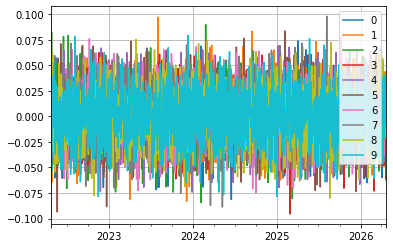

In [51]:
names2 = ["FB", "AMZN", "^GSPC"]
means2 = [media_FB_H, media_AMZN_H, media_GSPC_H]
stds2  = [std_FB_H, std_AMZN_H, std_GSPC_H]

sims  = simR(names, means, stds, "2022-04-23", 1461, 10)
sims["FB"].plot(grid=True)

In [52]:
sims          = simR(names2, means2, stds2, "2022-04-23", 1461, 1000)

sims["FB"]    = (sims["FB"] + 1).cumprod()*data2["FB"].iloc[-1]
sims["AMZN"]  = (sims["AMZN"] + 1).cumprod()*data2["AMZN"].iloc[-1]
sims["^GSPC"] = (sims["^GSPC"] + 1).cumprod()*data2["^GSPC"].iloc[-1]

sims["FB"].head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2022-04-23,182.718308,189.071823,184.071344,190.825945,184.108152,178.257419,177.508263,185.949252,176.691884,193.811799,...,184.133034,187.387918,188.324915,190.762362,185.055867,191.204820,187.705964,185.044453,180.423050,185.318890
2022-04-24,173.880936,185.261596,182.924818,202.515849,176.962427,181.232291,174.687172,180.077199,181.544489,193.131985,...,182.967264,199.062409,187.753884,183.956519,195.855468,193.440299,183.504164,183.678723,184.580373,180.412072
2022-04-25,178.654284,185.699735,186.028084,201.189647,178.195207,188.336139,178.166684,186.141398,188.017250,188.907792,...,187.892554,199.810534,190.317347,182.616306,198.249814,185.379666,188.822163,187.563672,194.388347,187.644372
2022-04-26,174.189204,186.712343,186.630734,202.567137,178.744950,185.374774,177.627214,184.707002,185.164017,186.742154,...,185.126639,202.277233,190.037259,179.251523,202.060132,184.577950,179.430601,181.131422,188.332626,189.914106
2022-04-27,179.384239,183.659637,183.526208,202.224801,177.595189,184.406107,180.738850,191.799361,185.374150,189.407359,...,188.181302,200.982813,184.971956,177.413641,203.315467,181.352693,179.019401,179.552869,188.431783,191.556332


In [53]:
valor_deseado_FB_H         = data2["FB"].iloc[-1]*2
valor_deseado_AMZN_H       = data2["AMZN"].iloc[-1]*2
valor_deseado_GSPC_H       = data2["^GSPC"].iloc[-1]*2

B_FB_H    = sims["FB"]    >= valor_deseado_FB_H
B_AMZN_H  = sims["AMZN"]  >= valor_deseado_AMZN_H
B_GSPC_H  = sims["^GSPC"] >= valor_deseado_GSPC_H

<AxesSubplot:>

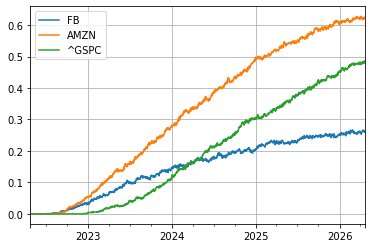

In [54]:
P_FB_H   = B_FB_H.mean(axis=1)
P_FB_H.columns   = ["FB"]

P_AMZN_H = B_AMZN_H.mean(axis=1)
P_AMZN_H.columns = ["AMZN"]

P_GSPC_H = B_GSPC_H.mean(axis=1)
P_GSPC_H.columns = ["^GSPC"]

data4          = pd.DataFrame(index=pd.date_range("2022-04-23", 1461), columns=["FB", "AMZN", "^GSPC"])
data4["FB"]    = P_FB_H
data4["AMZN"]  = P_AMZN_H
data4["^GSPC"] = P_GSPC_H

data4.plot(grid=True)

## Conclusiones

1. Podemos concluir que en este caso el modelo de predicción nos indica que es certero, ya que se puso a prueba con 2 períodos de fecha de un intervalo de 4 años entre cada fecha.
2. El inversionista debería de invertir en las acciones debido a que esto le asegura que podrá pagar la universidad de su hijo, e incluso si quisiera invertir más podría generar más dinero.
3. El modelo cumplió con los objetivos del planteamiento y se reflejó en los resultados. 

## Referencias

https://finance.yahoo.com